<a href="https://colab.research.google.com/github/sheraphineshovan/Imarticus_miniproject/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apporoach to loaan prediction

1. Import libraries
2. Load and Audit the data
3. Data preparation and Data transformation
      - Missing values: Impute all missing values using mean,mode,median.
      - Inconsistant values: Replace all inconsistances with consistent values
      - Outliers: Transform or let the algorithm deal
4. Data visualization
5. Data analysis
      - Uni-Variate Analysis(Mean,Mode,Median,Skewness)
      - Bi-Variate Analysis(Corelation,covariance,Chi-Sqare test)
      - Multi-Variate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats



Load the data and audit the data

In [73]:
train = pd.read_csv('/content/HeartDisease.csv')

Audit the data

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
train.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
train.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [77]:
train.skew()

age                   -0.202463
gender                -0.791335
chest_pain             0.484732
rest_bps               0.713768
cholestrol             1.143401
fasting_blood_sugar    1.986652
rest_ecg               0.162522
thalach               -0.537410
exer_angina            0.742532
old_peak               1.269720
slope                 -0.508316
ca                     1.310422
thalassemia           -0.476722
target                -0.179821
dtype: float64

<AxesSubplot:>

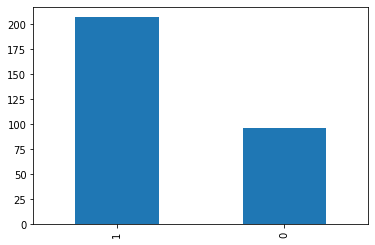

In [78]:
train['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

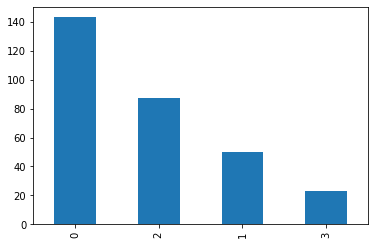

In [79]:
train['chest_pain'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='fasting_blood_sugar'>

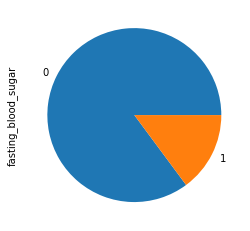

In [80]:
train['fasting_blood_sugar'].value_counts().plot(kind='pie')

<AxesSubplot:>

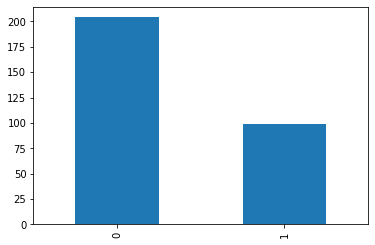

In [87]:
train['exer_angina'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Self_Employed'>

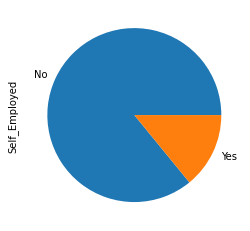

In [ ]:
train['Self_Employed'].value_counts().plot(kind='pie')

<AxesSubplot:>

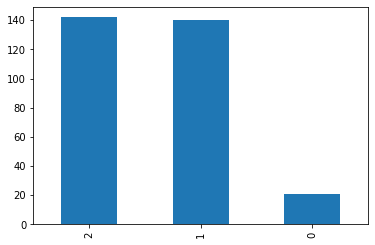

In [88]:
train['slope'].value_counts().plot(kind='bar')

Data Preparation UDF

In [84]:
train.isnull().sum()
#since there is no null values then we can continue with train test split

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [85]:
train.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [86]:
from scipy.stats import chi2_contingency
def chi_sq(var1,var2):
  table = pd.crosstab(var1,var2)
  _,p,_,_ = chi2_contingency(table)
  if p<= 0.05:
    print('Accept the alternative hypothesis',round(p,2))
  else:
    print("Failed to reject the null hypothesis", round(p,2))
  return table


    - Null hypothesis: var1 and var2 is independent
    - Alternative Hypothesis: var1 and var2 is dependent

In [112]:
chi_sq(train['gender'],train['target'])

Accept the alternative hypothesis 0.0


target,0,1
gender,,
0,24,72
1,114,93


In [ ]:
chi_sq(train['Education'],train['Loan_Status'])

Accept the alternative hypothesis 0.04


Loan_Status,0,1
Education,,
0,140,340
1,52,82


In [ ]:
chi_sq(train['Credit_History'],train['Loan_Status'])

Accept the alternative hypothesis 0.0


Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,110,415


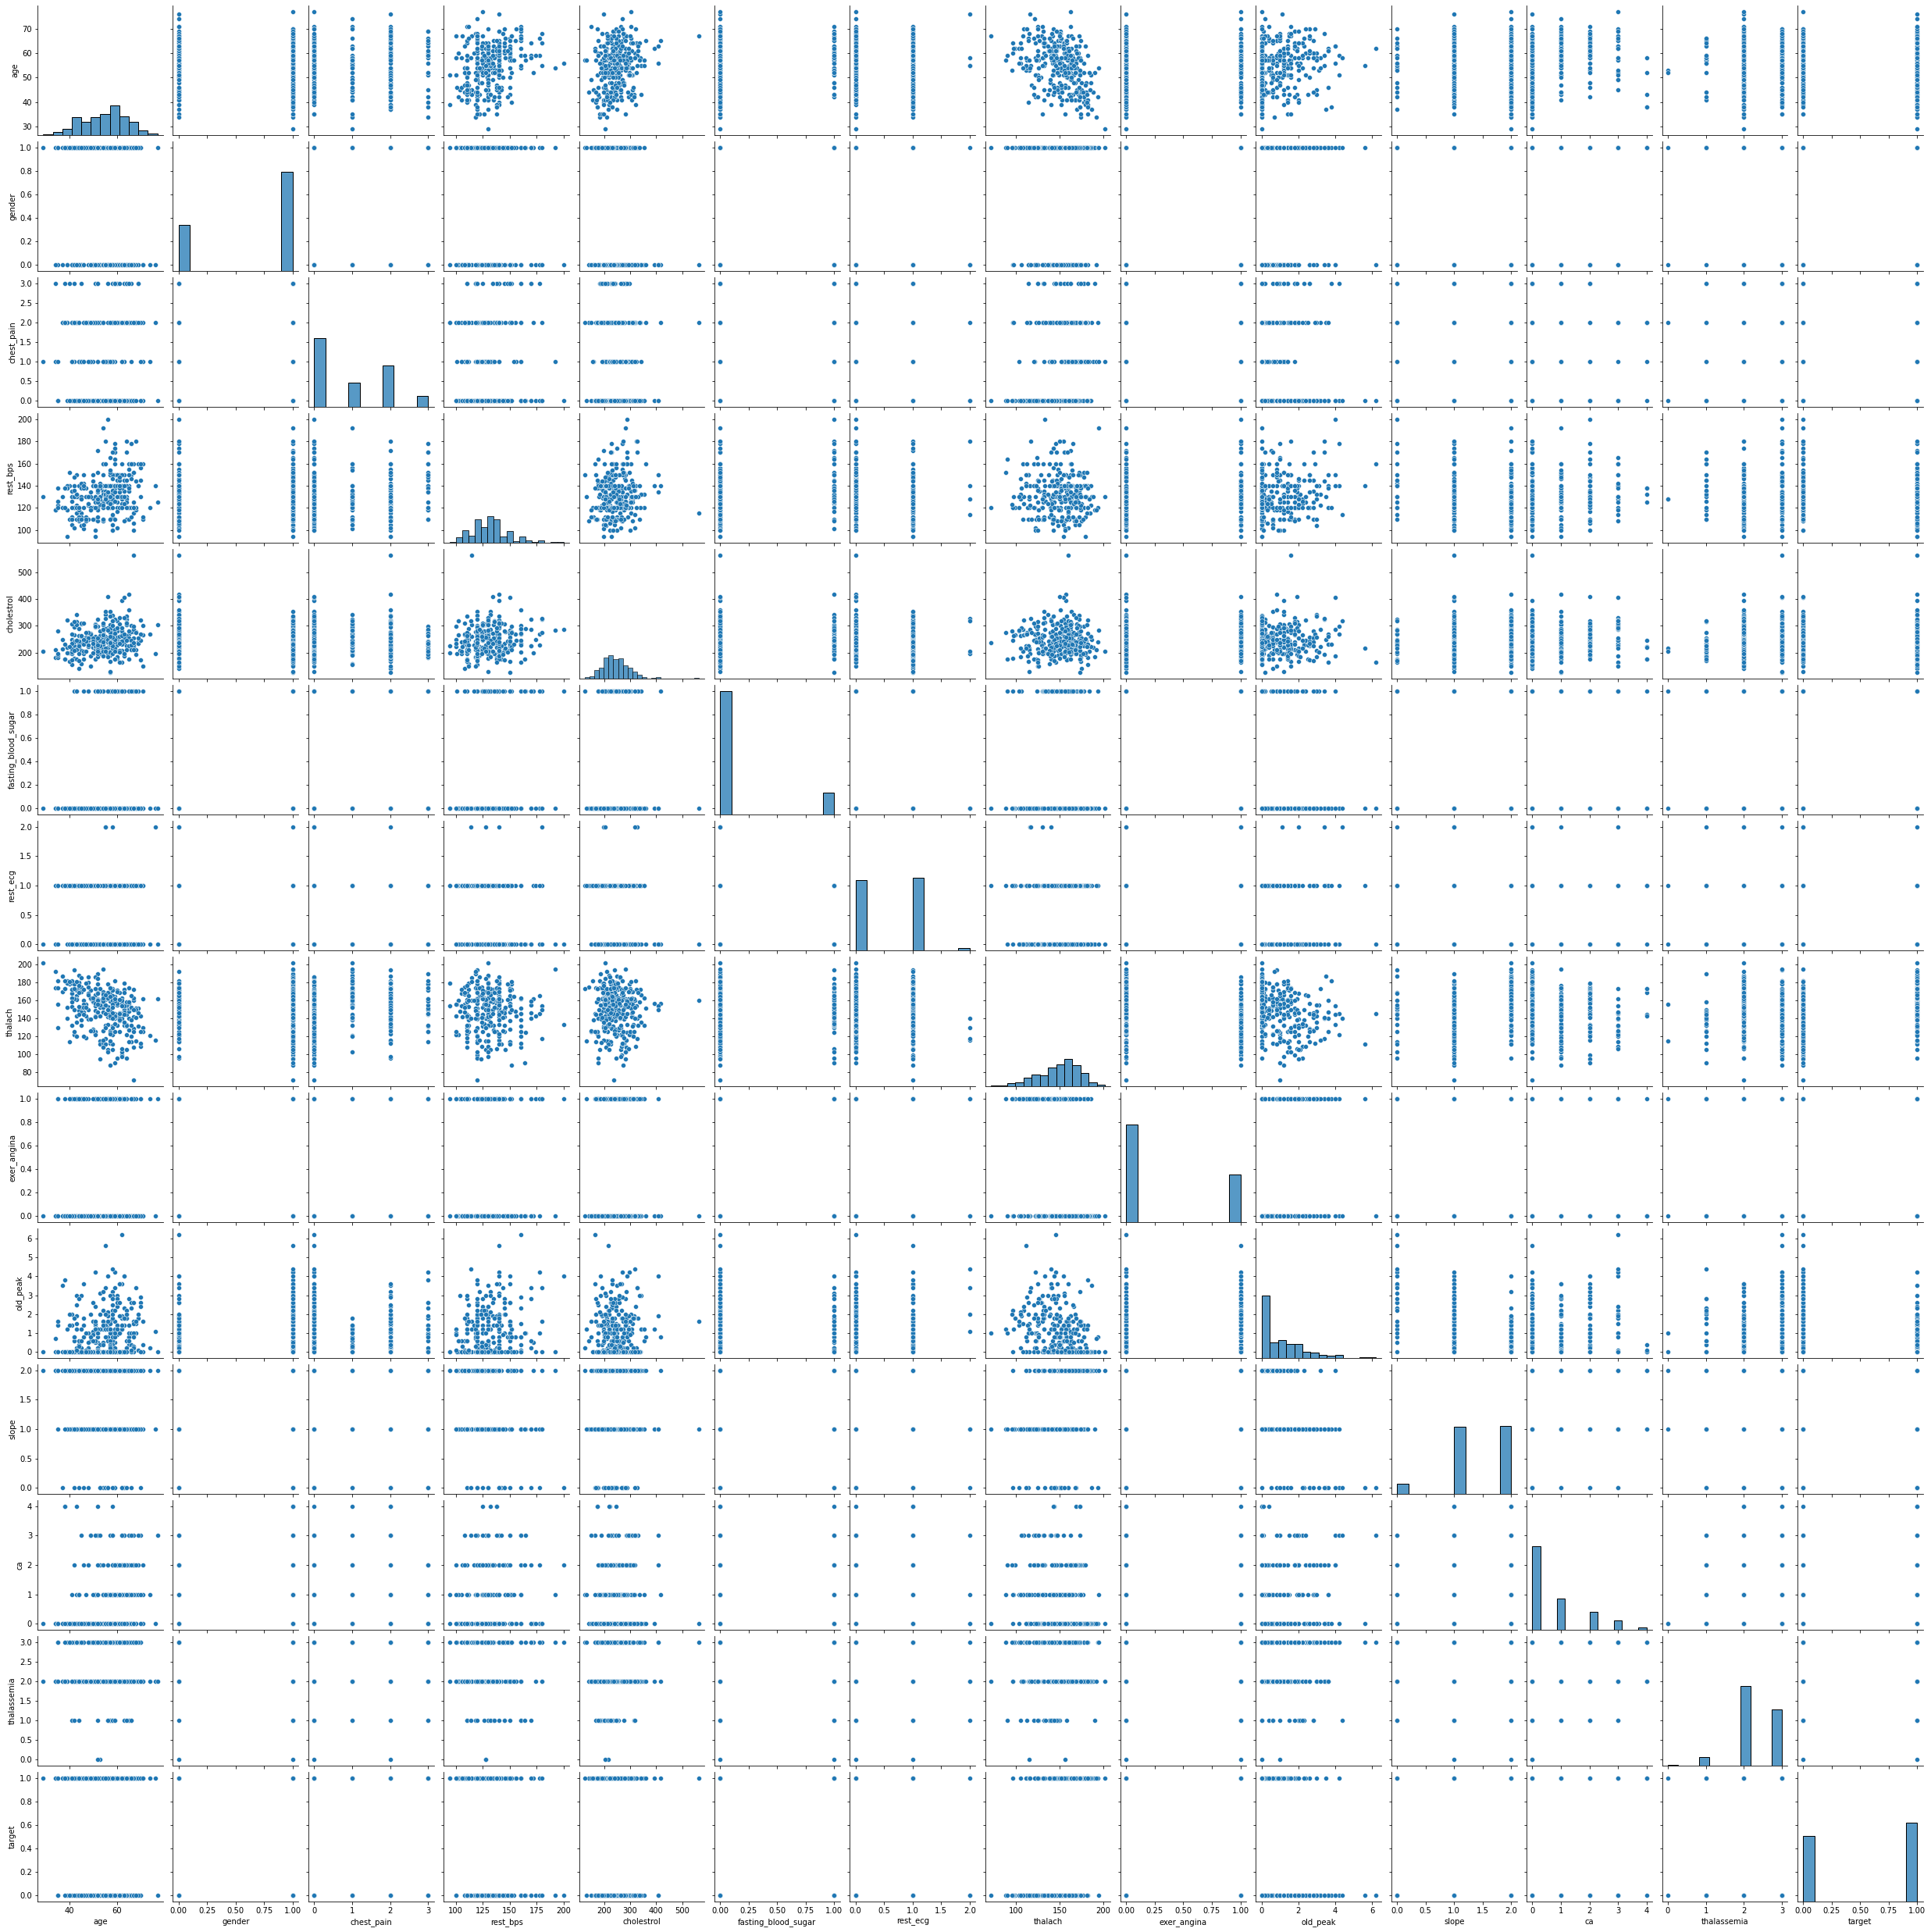

In [90]:
sns.pairplot(train)

Split train data into train and test

In [113]:
x = train.drop(['target'], axis = 1)
y = train['target']

In [114]:
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [116]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(212, 13)
(91, 13)
(91,)
(212,)


In [118]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_ytrain_lr = lr.predict(x_train)
pred_ytest_lr = lr.predict(x_test) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("The accuracy is ", round(acc_score,2))
  print(cm_matrix)
  print(class_rep)


In [120]:
acc_report(y_train,pred_ytrain_lr)

The accuracy is  0.86
[[ 79  21]
 [  8 104]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       100
           1       0.83      0.93      0.88       112

    accuracy                           0.86       212
   macro avg       0.87      0.86      0.86       212
weighted avg       0.87      0.86      0.86       212



In [121]:
acc_report(y_test,pred_ytest_lr)

The accuracy is  0.81
[[33  5]
 [12 41]]
              precision    recall  f1-score   support

           0       0.73      0.87      0.80        38
           1       0.89      0.77      0.83        53

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91



Bias Variance Trads Off              
              -  bias is high model accuracy
              - variance is low model accuracy in test and train
              - low bias and high variance is overfitting
              - adv of logistic regression is it has low varaince



In [122]:
lr.predict_proba(x_train)

array([[9.90591151e-01, 9.40884866e-03],
       [9.68483572e-01, 3.15164284e-02],
       [4.27900893e-01, 5.72099107e-01],
       [4.62416073e-01, 5.37583927e-01],
       [3.96565325e-01, 6.03434675e-01],
       [2.93368058e-01, 7.06631942e-01],
       [1.22545272e-02, 9.87745473e-01],
       [6.37908758e-01, 3.62091242e-01],
       [8.52543458e-02, 9.14745654e-01],
       [1.52924884e-01, 8.47075116e-01],
       [9.81995440e-01, 1.80045600e-02],
       [9.77132670e-01, 2.28673296e-02],
       [9.85465983e-01, 1.45340172e-02],
       [3.12331081e-01, 6.87668919e-01],
       [5.91937510e-02, 9.40806249e-01],
       [9.99302004e-01, 6.97995559e-04],
       [1.63886553e-01, 8.36113447e-01],
       [6.44746474e-02, 9.35525353e-01],
       [5.61774661e-02, 9.43822534e-01],
       [8.99879610e-01, 1.00120390e-01],
       [9.63082023e-03, 9.90369180e-01],
       [6.31726018e-02, 9.36827398e-01],
       [1.47333538e-01, 8.52666462e-01],
       [8.39213717e-01, 1.60786283e-01],
       [7.663130

Decision Tree Implementation

In [123]:

  dtree = DecisionTreeClassifier(max_depth = 3,min_samples_split = 4)
  dtree.fit(x_train,y_train)
  preds_dtree_train = dtree.predict(x_train)
  preds_dtree_test = dtree.predict(x_test)


In [124]:
acc_report(y_train,preds_dtree_train)

The accuracy is  0.88
[[ 79  21]
 [  5 107]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       100
           1       0.84      0.96      0.89       112

    accuracy                           0.88       212
   macro avg       0.89      0.87      0.88       212
weighted avg       0.89      0.88      0.88       212



In [125]:
acc_report(y_test,preds_dtree_test)

The accuracy is  0.79
[[26 12]
 [ 7 46]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        38
           1       0.79      0.87      0.83        53

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.79      0.79        91



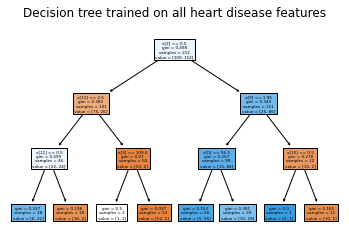

In [126]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
clf = DecisionTreeClassifier(max_depth = 3).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("Decision tree trained on all heart disease features")
plt.show()


Random Forest Model

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rf = RandomForestClassifier(n_estimators = 20,max_depth=3, verbose = 1)
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestClassifier(max_depth=3, n_estimators=20, verbose=1)

In [129]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [130]:
acc_report(y_train,preds_rf_train)

The accuracy is  0.87
[[ 78  22]
 [  6 106]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       100
           1       0.83      0.95      0.88       112

    accuracy                           0.87       212
   macro avg       0.88      0.86      0.87       212
weighted avg       0.88      0.87      0.87       212



In [131]:
acc_report(y_test,preds_rf_test)

The accuracy is  0.84
[[32  6]
 [ 9 44]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        38
           1       0.88      0.83      0.85        53

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91

